In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
table_awal = pd.read_csv('data_input/data.csv')

In [3]:
table_awal

ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
0      708746      17/08/2017    17/08/2017         916         103916  30-34   
1      708749      17/08/2017    17/08/2017         916         103917  30-34   
2      708771      17/08/2017    17/08/2017         916         103920  30-34   
3      708815      30/08/2017    30/08/2017         916         103928  30-34   
4      708818      17/08/2017    17/08/2017         916         103928  30-34   
...       ...             ...           ...         ...            ...    ...   
1138  1314410      19/08/2017    19/08/2017       45-49              F    109   
1139  1314411      19/08/2017    19/08/2017       45-49              F    110   
1140  1314412      19/08/2017    19/08/2017       45-49              F    111   
1141  1314414      17/08/2017    17/08/2017       45-49              F    113   
1142  1314415      17/08/2017    17/08/2017       45-49              F    114   

     gender  interest1  interest2  interest3   impressions  clicks  spent  \
0         M         15         17         17   7350.000000       1   1.43   
1         M         16         19         21  17861.000000       2   1.82   
2         M         20         25         22    693.000000       0   0.00   
3         M         28         32         32   4259.000000       1   1.25   
4         M         28         33         32   4133.000000       1   1.29   
...     ...        ...        ...        ...           ...     ...    ...   
1138    111        114    1129773        252    358.189997      13   2.00   
1139    111        116     637549        120    173.880003       3   0.00   
1140    113        117     151531         28     40.289999       2   0.00   
1141    114        117     790253        135    198.710000       8   2.00   
1142    116        118     513161        114    165.609999       5   2.00   

      total_conversion  approved_conversion  
0                  2.0                  1.0  
1                  2.0                  0.0  
2                  1.0                  0.0  
3                  1.0                  0.0  
4                  1.0                  1.0  
...                ...                  ...  
1138               NaN                  NaN  
1139               NaN                  NaN  
1140               NaN                  NaN  
1141               NaN                  NaN  
1142               NaN                  NaN  

[1143 rows x 15 columns]

In [4]:
table_awal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
ad_id                  1143 non-null int64
reporting_start        1143 non-null object
reporting_end          1143 non-null object
campaign_id            1143 non-null object
fb_campaign_id         1143 non-null object
age                    1143 non-null object
gender                 1143 non-null object
interest1              1143 non-null int64
interest2              1143 non-null int64
interest3              1143 non-null int64
impressions            1143 non-null float64
clicks                 1143 non-null int64
spent                  1143 non-null float64
total_conversion       761 non-null float64
approved_conversion    761 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 134.1+ KB


In [5]:
table_awal.dtypes

ad_id                    int64
reporting_start         object
reporting_end           object
campaign_id             object
fb_campaign_id          object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
dtype: object

# Extract Summary

In [6]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = campaigns['reporting_start'].astype('datetime64')
  campaigns['reporting_end'] = campaigns['reporting_end'].astype('datetime64')   
  start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
  end_date = campaigns['reporting_end'].max().strftime(format="%d %b %Y")

  total_spent = int(campaigns['spent'].sum())
  total_conversion = int(campaigns['total_conversion'].sum())

  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[['spent','total_conversion']].sum()
  cpc['CPC'] = cpc['spent']/cpc['total_conversion']
  cpc_each = dict()
  for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each}

In [7]:
extract_summary()

{'start_date': '18 Aug 2017',
 'end_date': '30 Aug 2017',
 'total_spent': 19470,
 'total_conversion': 1398,
 'cpc': {'936': 8.13, '1178': 15.91}}

In [8]:
file_path="data_input/data.csv"
id=['936','1178']


fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

In [9]:
campaigns.head()

ad_id reporting_start reporting_end campaign_id fb_campaign_id    age  \
55  734210      25/08/2017    25/08/2017         936         108654  30-34   
56  734215      26/08/2017    26/08/2017         936         108655  30-34   
60  734290      26/08/2017    26/08/2017         936         108668  30-34   
63  734352      27/08/2017    27/08/2017         936         108678  35-39   
64  734361      29/08/2017    29/08/2017         936         108680  35-39   

   gender  interest1  interest2  interest3  impressions  clicks  spent  \
55      M         10         16         13      13329.0       4   5.63   
56      M         15         19         17      13659.0       3   3.84   
60      M         29         32         35       5374.0       1   1.04   
63      M         10         11         16       4423.0       1   1.46   
64      M         16         19         19      12382.0       2   2.84   

    total_conversion  approved_conversion  
55               1.0                  1.0  
56               1.0                  0.0  
60               4.0                  0.0  
63               1.0                  1.0  
64               1.0                  1.0

In [10]:
# Make sure to passed in appropriate preprocessing before extracting the start and end date

campaigns['reporting_start'] = campaigns['reporting_start'].astype('datetime64')
campaigns['reporting_end'] = campaigns['reporting_end'].astype('datetime64')   
start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_end'].max().strftime(format="%d %b %Y")

total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

----

In [11]:
cpc = campaigns.groupby(['campaign_id'])[['spent','total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion']
cpc_each = dict()

for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)    

In [12]:
cpc_each

{'936': 8.13, '1178': 15.91}

----

# Create Plot

In [13]:
def create_plot(file_path="data_input/data.csv", id=['936', '1178']):
  """   
  Fetch data from data source and export as plot
  """
  fb = pd.read_csv(file_path, parse_dates=[1,2])
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Create a grouped dataframe based on campaign id, age group, and reporting date
  # Calculate the total converision of each group
  grouped = campaigns.groupby(by=['campaign_id', 'age', 'reporting_start'], as_index=False)['total_conversion'].sum()

  fig = plt.figure(1, figsize=(15,6))

  # Iterate to create 1 plot campaign at a time
  for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())


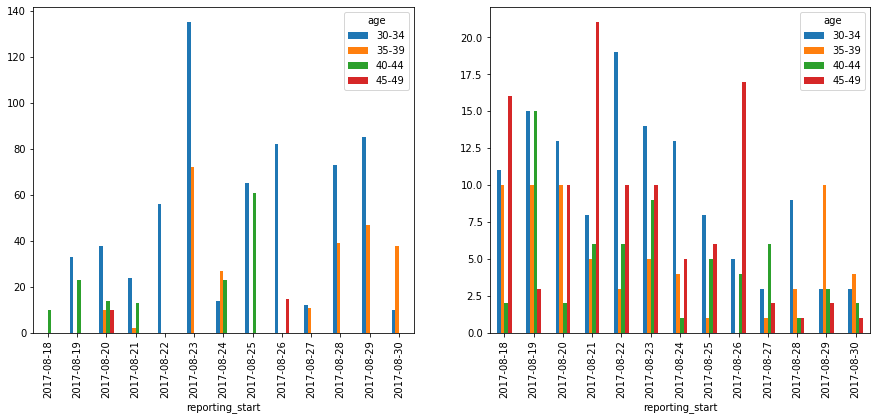

In [14]:
create_plot()

In [15]:

grouped = campaigns.groupby(
        by=['campaign_id', 'age', 'reporting_start'], as_index=False)\
        ['total_conversion'].sum()
grouped


campaign_id    age reporting_start  total_conversion
0         1178  30-34      2017-08-19              33.0
1         1178  30-34      2017-08-20              38.0
2         1178  30-34      2017-08-21              24.0
3         1178  30-34      2017-08-22              56.0
4         1178  30-34      2017-08-23             135.0
..         ...    ...             ...               ...
74         936  45-49      2017-08-26              17.0
75         936  45-49      2017-08-27               2.0
76         936  45-49      2017-08-28               1.0
77         936  45-49      2017-08-29               2.0
78         936  45-49      2017-08-30               1.0

[79 rows x 4 columns]

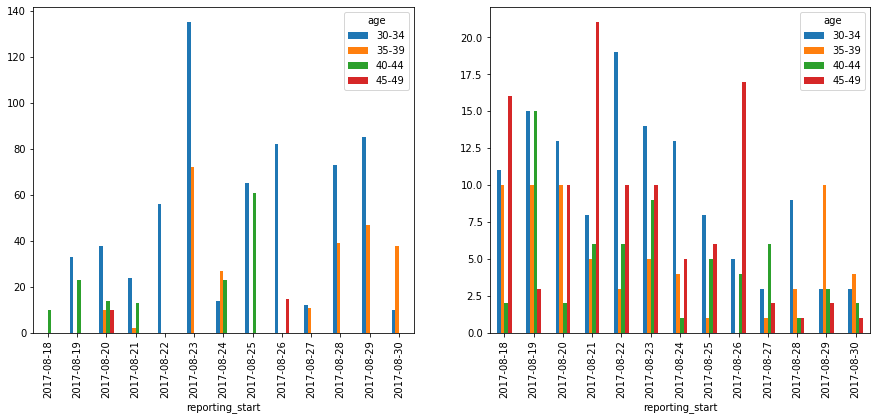

In [16]:
fig = plt.figure(1, figsize=(15,6))

# Iterate to create 1 plot campaign at a time
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())
        

In [19]:
import os
import smtplib

EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']

s = smtplib.SMTP("smtp.gmail.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)

msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL,to_addrs=["tanesya@algorit.ma", "kosasih_cherry10@yahoo.com"], msg=msg)

{}

In [21]:
def authenticate_account(EMAIL, PASSWORD, SERVER='gmail'):
"""
Authenticate SMTP account for gmail
Other host is not supported
"""
if(SERVER == 'gmail'):
host = 'smtp.gmail.com'
port = 587
else:
raise("Email host is not supported")
s = smtplib.SMTP(host=host, port=port)
s.starttls()
s.login(EMAIL, PASSWORD)

return s

IndentationError: expected an indented block (<ipython-input-21-b3ef564456b3>, line 5)